In [1]:
from qutip import *
from withQTip import Walk
from shadok.progress_bar import ProgressIterator
import matplotlib.pyplot as plt

1.00e+00eV


### PRINCIPE DE LA SIMULATION

On simule ici la méthode du Coin Toss pour générer la marche aléatoire. Le **"Coin"** agit sur le spin et est une matrice 2x2. On définit aussi une particule de départ **"start"**.

### LES EXEMPLES DE L'ARTICLE

Prenons un exemple de l'article. Celui-ci est censé donner l'image suivante :<br>

<img src="Résultat de l'article.png">


Performing Walk... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 100.0% - 0.303s
Espérance : -28.975560156371703
Ecart type : 45.714759590513516
Cardinal : 97%
Diversity : 98%
WALK START :
Coin : [[ 1  1]
 [ 1 -1]]
Particle : 1.000+0.000j*|+> + 0.000+0.000j*|->



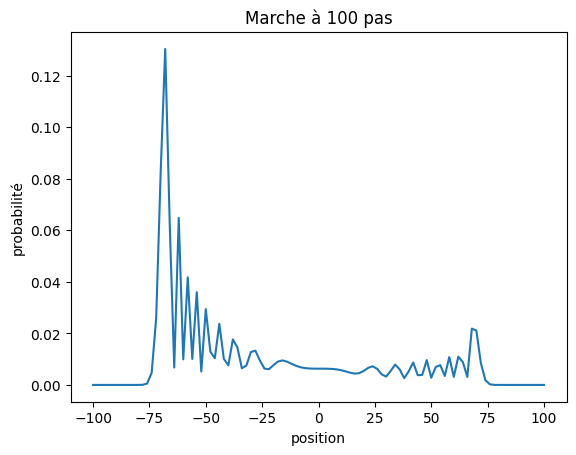

In [2]:
Walk.set_steps(100)

coin=[
        [1,1],
        [1,-1]
    ]

start=tensor(
    Walk.spin("+"),
    Walk.position(0)
)

simulation = Walk(start,coin)
simulation.run()

Performing Walk... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 100.0% - 0.394s
Espérance : 1.1002483646382899e-15
Ecart type : 39.17781002363951
Cardinal : 101%
Diversity : 52%
WALK START :
Coin : [[ 1.+0.j   0.+0.1j]
 [-0.-0.1j  1.+0.j ]]
Particle : 0.707+0.000j*|+> + 0.000+0.707j*|->



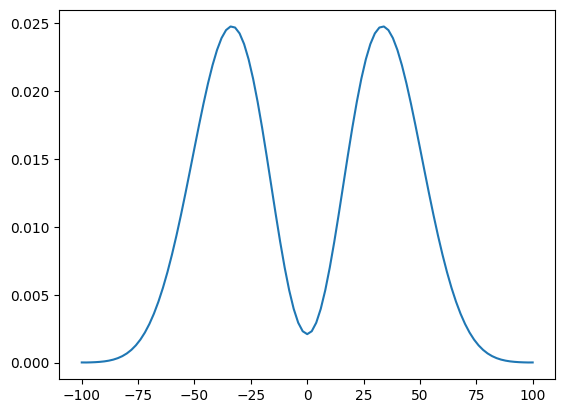

In [3]:
Walk.set_steps(100) #avec un coin 
OMEGA = 0.1
coin=[
        [1,OMEGA*1j],
        [-OMEGA*1j,1]
    ]

start = tensor(
    Walk.spin("+")+1j*Walk.spin("-"),
    Walk.position(0)
)

simulation = Walk(start,coin)
simulation.run()

### UN MIXE DES DEUX QUI MARCHE MIEUX

Les paramètres les plus prometteurs permettent d'obtenir le résultat suivant.

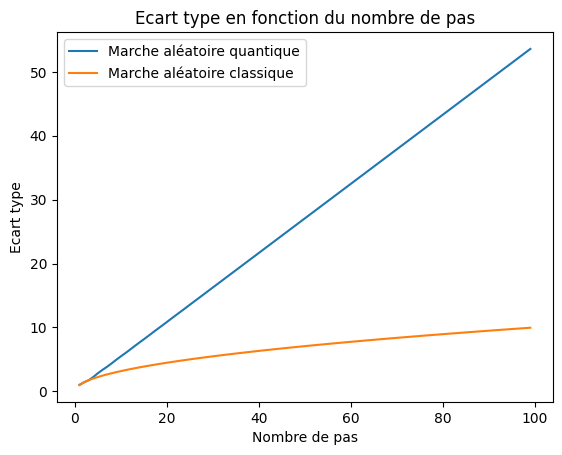

In [12]:
X=[]
Y=[]
Z=[]
for i in range(1,100):
    Walk.set_steps(i)
    coin=[
            [1,1],
            [1,-1]
        ]

    start = tensor(
        Walk.spin("+")+1j*Walk.spin("-"),
        Walk.position(0)
    )

    simulation = Walk(start,coin)
    simulation.run(show=False,show_progress=False)
    v = simulation.variance()
    X.append(i)
    Y.append(v**(1/2)) #ecart type = sqrt(variance)
    Z.append(i**(1/2))

fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.set_xlabel("Nombre de pas")
ax.set_ylabel("Ecart type")
ax.set_title("Ecart type en fonction du nombre de pas")
ax.plot(X,Y,label="Marche aléatoire quantique")
ax.plot(X,Z,label="Marche aléatoire classique")
ax.legend()

    

Performing Walk... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 100.0% - 0.899s
Espérance : -1.9167614313733506e-15
Ecart type : 54.12413815289814
Cardinal : 97%
Diversity : 50%
WALK START :
Coin : [[ 1  1]
 [ 1 -1]]
Particle : 0.707+0.000j*|+> + 0.000+0.707j*|->



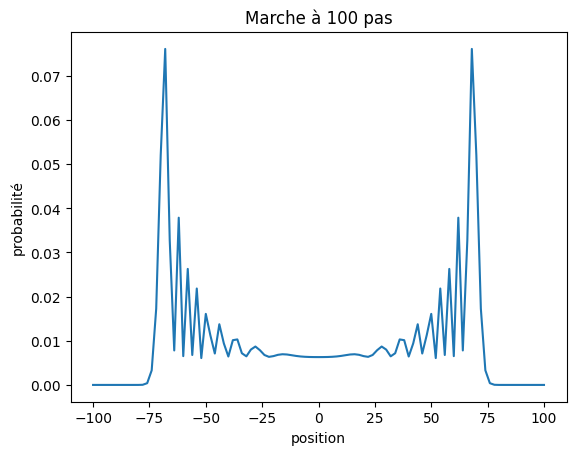

In [3]:
Walk.set_steps(100)
coin=[
        [1,1],
        [1,-1]
    ]

start = tensor(
    Walk.spin("+")+1j*Walk.spin("-"),
    Walk.position(0)
)

simulation = Walk(start,coin)
simulation.run()

### EST-IL FACILE D'OBTENIR UNE VARIANCE EN N ?

On se demande ici s'il est facile d'obtenir les résultts précédents, s'il existent beaucoup de configurations intéressantes ou non. On crée des marches aléatoires à partir de configuration aléatoires (a partir de coefficients discrets ou non) et on garde les meilleurs. Comment évaluer les marches aléatoires obtenues ?

Une marche aléatoire efficace répond aux critère suivants :
<li>Espérance proche de zéro</li>
<li>Ecart-type le plus grand possible</li>
<li>Nombre de position avec probabilité zéro grand</li>
<li>Des variations dans la hauteur des pics, on ne veut pas qu'ils aient tous la même taille</li>

On joue ensuite sur les paramètres pour accorder plus ou moins d'importance à chaque critère.
On effectue différentes marches aléatoire sur 20 étapes, ont choisi la meilleurs marche, et on prolonge la marche jusqu'à 100 pas.
On obtient les marches suivantes.

In [5]:
STEPS=20
TEST_NUMBER=500
std_param=20
mean_param=30
cardinal_param=10*100
diversity_param=10*100

def evaluate(simulation):
    if simulation==None:
        return -float("inf")
    return simulation.std()*std_param - abs(simulation.mean())*mean_param + simulation.cardinal()*10 + diversity_param*simulation.diversity()

def test(values=None):
    Walk.set_steps(STEPS)
    best_simulation=None
    for i in ProgressIterator(range(TEST_NUMBER)):
        try:
            coin = Walk.randomCoin(values)
            particle=Walk.randomParticle(values)
            simulation=Walk(particle,coin)
            simulation.run(show=False,show_progress=False)
            if (evaluate(simulation)>evaluate(best_simulation)):
                best_simulation=simulation
        except ZeroDivisionError:
            pass


    up,down = Walk.get_spin_coordinates(best_simulation.start)
    Walk.set_steps(100)
    best_simulation = Walk(tensor(Walk.spin("+")*up+Walk.spin("-")*down,Walk.position(0)),best_simulation.coin)
    best_simulation.run(show_progress=False)


Processing... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 100.0% - 34.523s
Espérance : 0.9008460819804983
Ecart type : 13.917939890299763
Cardinal : 99%
Diversity : 100%
WALK START :
Coin : [[0.24790279+0.87439303j 0.69652708+0.07034425j]
 [0.34787682+0.10507544j 0.29186412+0.86704902j]]
Particle : 0.463+0.075j*|+> + 0.029+0.883j*|->



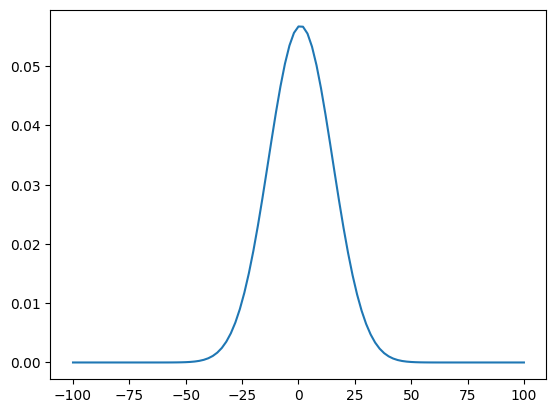

In [6]:
test()

Comme on peut le constater, ce n'est pas très concluant. On va donc préférer les résultats donnés par l'article.

Processing... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 100.0% - 37.312s
Espérance : 0.2052391378706383
Ecart type : 64.5168695984016
Cardinal : 101%
Diversity : 102%
WALK START :
Coin : [[ 1. +0.j -0.5+0.j]
 [ 1. +0.j  1. +0.j]]
Particle : 0.000+0.707j*|+> + -0.707+0.000j*|->



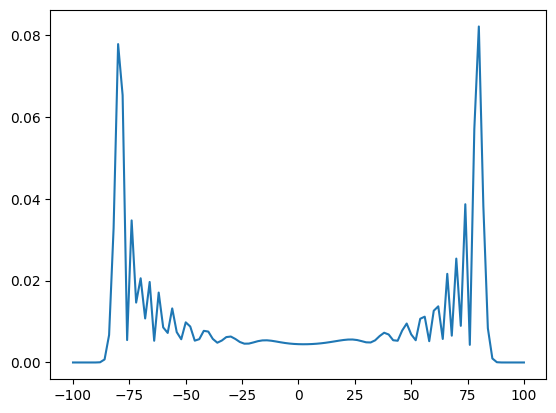

In [7]:
values=[0,1,-1,1j,-1j,0.5,-0.5,0.5j,-0.5j]
test(values)

La meilleure configuration qu'on obtienne est donc la suivante :

Coin : <br>
[ 1j   0.5j]<br>
[ -1    1. ]

Start : ( |+> - 1j * |-> ) * |0>


### IMPLEMENTATION DE L'ALGORITHME DE GROVER

Ca n'a rien à voir en fait...